In [62]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('dados_filtrados_v4.csv')

In [2]:
alunos = df["ID Aluno"].unique()
disciplinas = df['Código da disciplina'].unique()
# myColumns = ["curso", "saiu", "Cotista", "Raça", "Sexo", "Tipo de Escola"] + list(disciplinas)
newDf = pd.DataFrame(columns=disciplinas, index=alunos)
newDf[newDf.columns] = 0

In [3]:
df = df[['Código da disciplina', 'ID Aluno']]

In [4]:
for a in alunos:
    dis = df[df['ID Aluno'] == a]
    for d in dis['Código da disciplina']:
        newDf.at[a, d] +=1

In [5]:
newDf["curso"] = 0
newDf["saiu"] = 0
newDf["Tipo de Escola"] = 0
newDf["Raça"] = 0
newDf["Sexo"] = 0
newDf["Cotista"] = 0

In [6]:
df = pd.read_csv('dados_filtrados_v4.csv')
for aluno in alunos:
    b = df[df["ID Aluno"] == aluno]
    newDf.at[aluno, 'curso'] =  b.iloc[0]['Curso'].astype(int)
    newDf.at[aluno, 'saiu'] =  b.iloc[0]['saiu'].astype(int)
    newDf.at[aluno, 'Tipo de Escola'] =  b.iloc[0]['Tipo de Escola'].astype(int)
    newDf.at[aluno, 'Raça'] =  b.iloc[0]['Raça'].astype(int)
    newDf.at[aluno, 'Sexo'] =  b.iloc[0]['Sexo'].astype(int)
    newDf.at[aluno, 'Cotista'] =  b.iloc[0]['Cotista'].astype(int)
    

In [7]:
columns = newDf.columns
columns = list(columns[-6:]) + list(columns[:-6])
newDf = newDf[columns]

In [8]:
newDf.to_csv("aluno_quant_Materias.csv")

In [9]:
newDf = pd.read_csv('aluno_quant_Materias.csv', index_col=0)

In [10]:
#filtra cotistas
dfCotistas = newDf[newDf["Cotista"]==1]

In [51]:
#filtra materias
# undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
# newDf.drop([col for col, val in newDf.sum().iteritems() if val < 1000 and col not in undropableCol], axis=1, inplace=True)

In [ ]:
newDf

In [11]:
dfCotistas.to_csv("aluno_quant_Materias_cotistas.csv")

In [13]:
dfCotistas = pd.read_csv("aluno_quant_Materias_cotistas.csv", index_col=0)

In [14]:
for i in range(0, 6):
    a = dfCotistas[dfCotistas["curso"]== i]
    a.to_csv("aluno_quant_Materias_cotistas_" + str(i)+ ".csv")

In [123]:
df0 = pd.read_csv("aluno_quant_Materias_cotistas_0.csv", index_col=0)
df1 = pd.read_csv("aluno_quant_Materias_cotistas_1.csv", index_col=0)
df2 = pd.read_csv("aluno_quant_Materias_cotistas_2.csv", index_col=0)
df3 = pd.read_csv("aluno_quant_Materias_cotistas_3.csv", index_col=0)
df4 = pd.read_csv("aluno_quant_Materias_cotistas_4.csv", index_col=0)
df5 = pd.read_csv("aluno_quant_Materias_cotistas_5.csv", index_col=0)

In [124]:
#filtra materias
undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
dropVal = 70
df0.drop([col for col, val in df0.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df1.drop([col for col, val in df1.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df2.drop([col for col, val in df2.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df3.drop([col for col, val in df3.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df4.drop([col for col, val in df4.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df5.drop([col for col, val in df5.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)


In [125]:
disciplinas = list(df0.columns[6:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
s = pd.Series(index = disciplinas, dtype=float)
# disciplinas

In [126]:
a = df0.sum()
for d in disciplinas:
#     print (type(d))
    b  = df0[df0[str(d)]>0].count()
    s[d] = a[str(d)]/b[0]

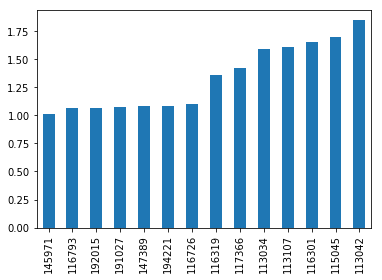

In [127]:
s.sort_values().plot.bar()

In [102]:
df0

,curso,saiu,Tipo de Escola,Raça,Sexo,Cotista,116301,116793,147389,118010,125156,117251,116319,192562,137481,113042,142573,113034,124010,191639,170054,194239,145971,116416,192015,113107,116327,116068,116823,118001,115045,191019,113115,182508,194671,194221,116441,116726,117234,116343,125172,116424,113093,167959,118044,113417,116459,116661,153699,181013,118036,117196,124575,116629,116432,132012,140481,118028,113956,118052,113930,191027,113301,116734,116921,177318,113051,116378,113859,116351,137553,134465,173215,116912,175021,113123,116394,116882,116467,175013,199443,163627,168831,116599,168823,168891,167941,160041,168238,118061,167681,168742,168734,117242,168882,168921,167673,114014,168777,169510,164399,168912,164887,167690,199371,113069,167991,168874,117218,167011,168840,181315,122408,113522,168769,160032,169617,167347,167657,170500,167029,170321,165000,167665,116785,116700,147630,142999,116653,194662,145874,134601,117315,142247,116572,200107,182869,194689,194735,116831,124028,116866,116891,142328,142336,116904,116360,142344,124036,192406,199389,191043,186791,113913,116947,191108,148709,199338,116637,165425,144231,170739,170721,124664,153206,145998,184802,150649,167967,169218,167070,167126,167878,142085,167983,169749,169676,167975,167053,167746,167495,199451,138827,124052,116530,160024,167266,160113,169650,163970,160075,167215,170381,170399,167894,132918,132489,132039,184021,132993,132021,132233,132144,185035,181129,115118,160091,167223,142000,186201,142891,145947,145955,186180,186236,181102,117200,181021,117366,140082,137995,137936,139301,116491,170801,160105,139190,135011,117595,160121,117536,175307,130079,182681,116521,199583,199460,117340,192732,117331,193020,191060,116858,146480,190071,150045,164534,163724,169382,167916,...,139742,186228,168629,168688,181277,132586,156272,169030,169056,169153,141020,143499,115258,132055,162418,162876,113638,162400,161187,161420,114596,132403,167479,137928,139599,137626,112135,112151,112402,116076,112020,138258,112348,116025,112054,112097,112305,114022,112038,112062,112071,112143,112119,116742,199648,137961,199621,199761,142719,191621,124583,184101,199753,199699,118265,118397,111139,111180,194531,117111,141135,193143,124524,199745,143316,149306,124141,128007,199800,167274,199681,185060,185248,157635,192953,182770,118249,125326,125571,119113,192929,156507,112488,178811,141011,191647,192988,192058,192937,193003,192945,192414,114618,112593,146277,118532,193011,169501,169471,115282,175854,192724,193046,186392,182125,194611,137979,139505,137707,175897,200093,166332,199575,112208,193135,192961,123820,122050,122475,122165,123277,120022,122441,125733,145891,118656,141178,141160,186244,186295,186261,181641,181650,186724,182109,137651,137511,137464,140660,181218,118257,149080,199427,111236,175803,154962,139041,147281,118648,125822,146315,168998,140937,113701,193038,185205,185116,366048,170151,139653,125148,121371,154032,154369,153087,154024,154105,154377,154091,154016,154245,153141,155004,118095,166910,168246,178951,175277,175862,175340,175871,140392,184420,154580,154415,156914,139874,141097,133957,192422,140546,154741,154474,154695,155331,154687,154750,154482,154504,154661,154491,155349,154601,154652,363154,194841,147991,199401,123421,132268,126250,200131,174009,121045,148962,148971,182745,193127,150142,150134,124672,185507,157023,157228,146501,125075,157643,136166,140228,111635,111589,132527,132926,132870,132853,199362,170666,133175,147656,200239,156639,146871,154903,144096,144860,144851,149462,144118,144088,182494
104476,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
df2["saiu"].value_counts()

 0    100
 1     85
-1     27
Name: saiu, dtype: int64

In [25]:
a = newDf[newDf['curso']== 3]
a["saiu"].value_counts()`

-1    521
 1    466
 0    411
Name: saiu, dtype: int64

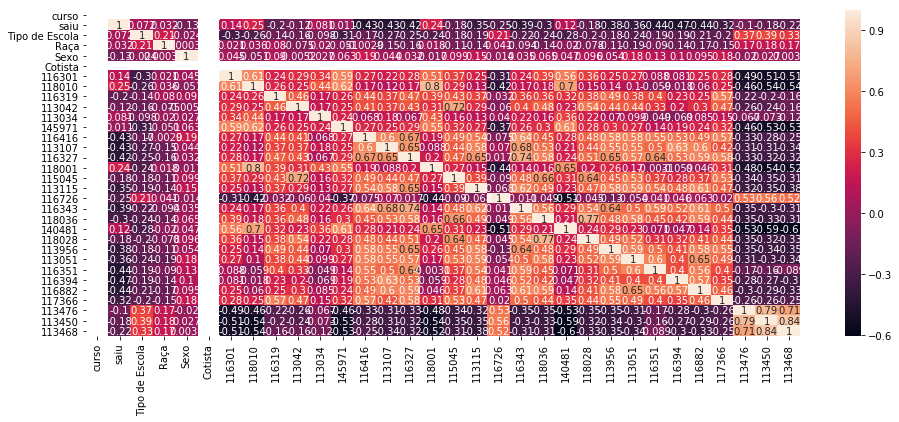

In [47]:
import seaborn as sns
f = df2.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(f, annot=True)